# Heart Dataset Analysis and ML Models

This notebook performs exploratory data analysis (EDA), preprocessing, and trains multiple classification models using a single reusable function. It includes evaluation metrics, confusion matrices, and ROC curves.

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, roc_curve, auc, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [2]:
# Load dataset
df = pd.read_csv(r'heart.csv')
print('Dataset loaded:', df.shape)
df.head()

Dataset loaded: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Basic info and missing values
print(df.info())
print('\nMissing values per column:\n', df.isnull().sum())
print('\nSummary statistics:\n', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0


Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


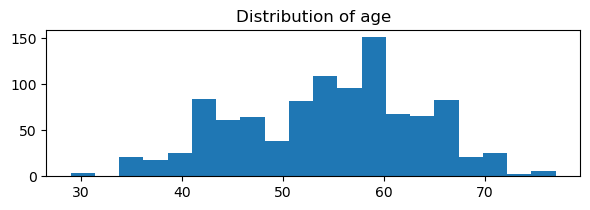

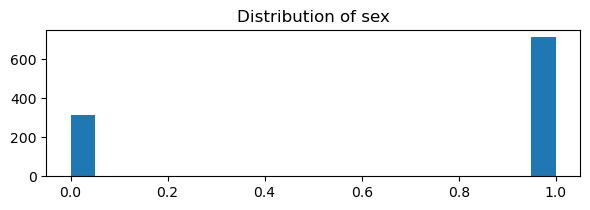

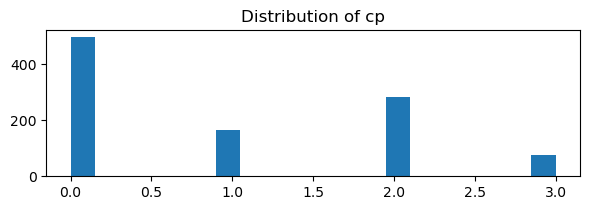

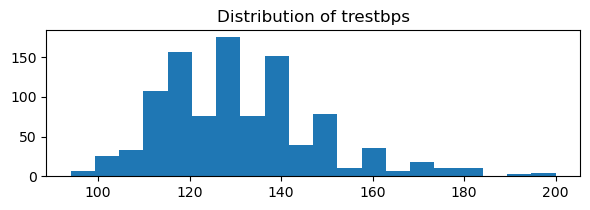

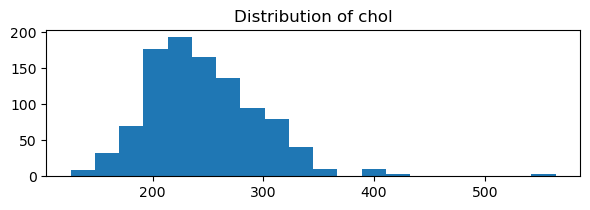

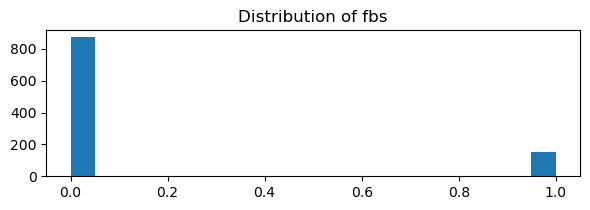

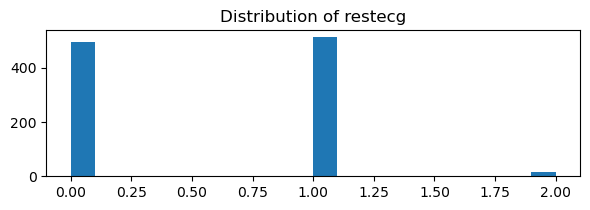

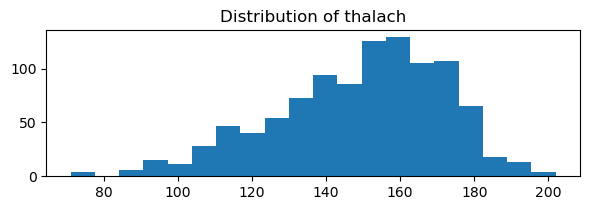

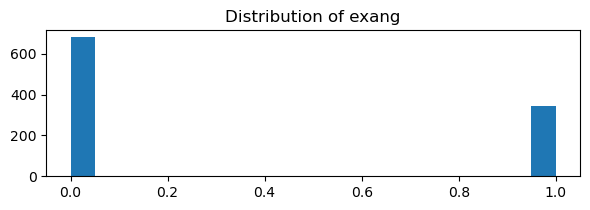

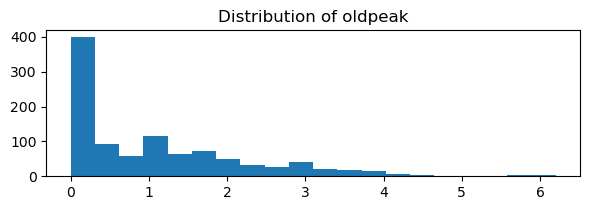

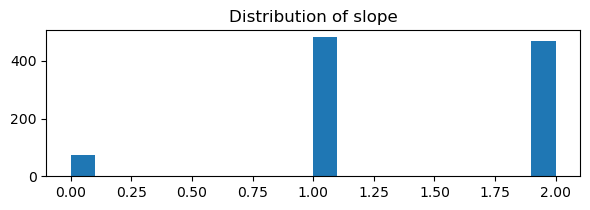

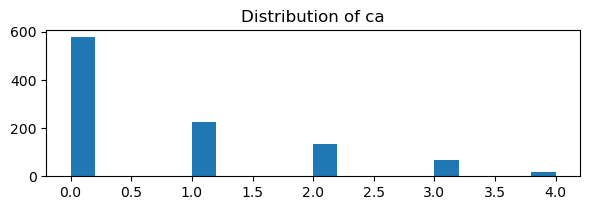

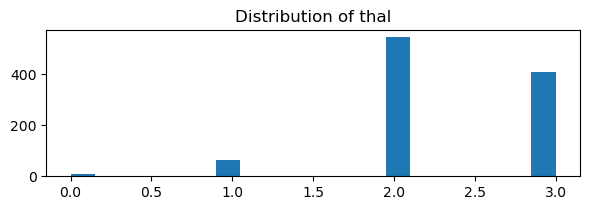

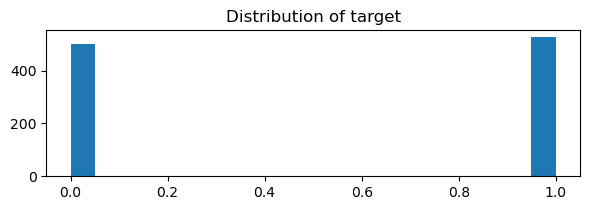

In [4]:
# Simple univariate plots for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', numeric_cols)
for col in numeric_cols:
    plt.figure(figsize=(6,2.2))
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

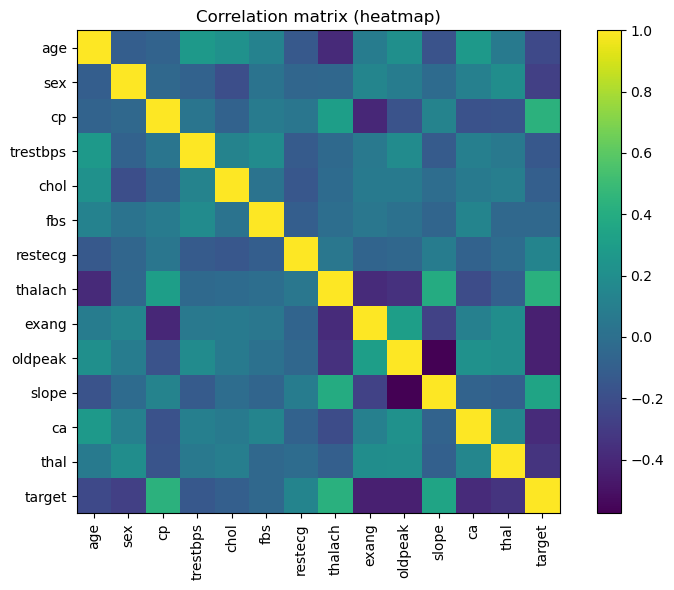

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [5]:
# Correlation matrix heatmap (matplotlib)
corr = df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.title('Correlation matrix (heatmap)')
plt.tight_layout()
plt.show()
corr

In [6]:
# Preprocessing: simple steps
# Assumes target column is named 'target' or 'Target' or 'heart_disease' - try common names
possible_targets = ['target','Target','heart_disease','HeartDisease','output']
target_col = None
for t in possible_targets:
    if t in df.columns:
        target_col = t
        break
if target_col is None:
    # fallback: last column as target
    target_col = df.columns[-1]

print('Using target column:', target_col)

X = df.drop(columns=[target_col])
y = df[target_col]

# Handle categorical columns (one-hot encode), handle missing by simple imputation
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(X.median())

# Standard scaling for numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print('Preprocessed X shape:', X_scaled.shape)

Using target column: target
Preprocessed X shape: (1025, 13)


In [7]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (820, 13) Test shape: (205, 13)


In [8]:
# Single function that trains multiple models, returns a summary and plots results
def run_models(models, X_train, y_train, X_test, y_test, cv=5):
    results = []
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    plt.figure(figsize=(8,6))
    for name, model in models:
        # cross-validated accuracy and roc_auc (if probability available)
        acc_cv = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy').mean()
        try:
            roc_cv = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc').mean()
        except Exception:
            roc_cv = np.nan
        # fit on train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        probs = None
        if hasattr(model, 'predict_proba'):
            probs = model.predict_proba(X_test)[:,1]
        elif hasattr(model, 'decision_function'):
            try:
                probs = model.decision_function(X_test)
            except Exception:
                probs = None
        # metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc = roc_auc_score(y_test, probs) if probs is not None and len(np.unique(y_test))==2 else np.nan
        results.append({
            'model': name,
            'cv_accuracy': acc_cv,
            'cv_roc_auc': roc_cv,
            'test_accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1': f1,
            'roc_auc': roc
        })
        # Plot ROC curve if possible
        if probs is not None and len(np.unique(y_test))==2:
            fpr, tpr, _ = roc_curve(y_test, probs)
            plt.plot(fpr, tpr, label=f'{name} (AUC={roc:.3f})' if not np.isnan(roc) else name)
    # finalize ROC plot
    plt.plot([0,1],[0,1],'--', label='random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves (for models with probability output)')
    plt.legend(loc='lower right', fontsize='small')
    plt.tight_layout()
    plt.show()
    return pd.DataFrame(results)

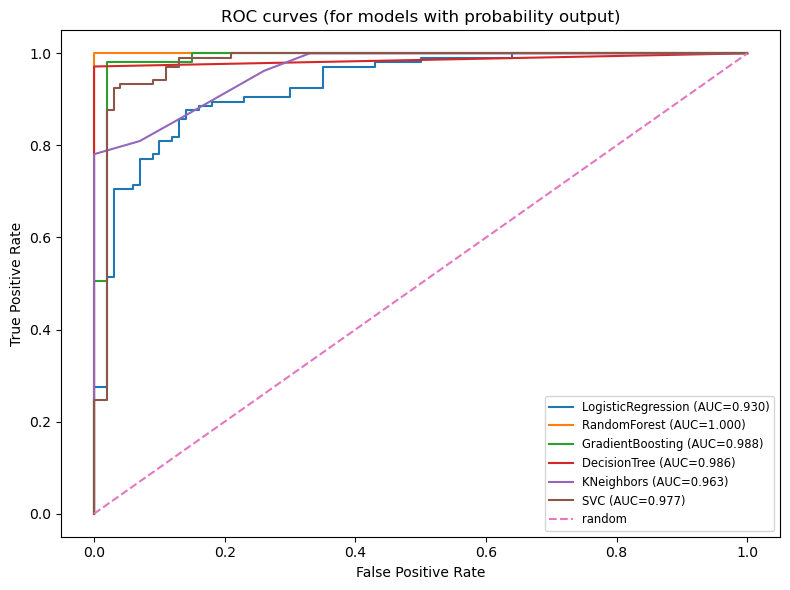

,model,cv_accuracy,cv_roc_auc,test_accuracy,precision,recall,f1,roc_auc
1,RandomForest,0.980488,0.998720,1.000000,1.000000,1.000000,1.000000,1.000000
3,DecisionTree,0.980488,0.980621,0.985366,1.000000,0.971429,0.985507,0.985714
2,GradientBoosting,0.963415,0.987499,0.975610,0.971698,0.980952,0.976303,0.987619
5,SVC,0.893902,0.969758,0.921951,0.908257,0.942857,0.925234,0.977143
4,KNeighbors,0.837805,0.945171,0.863415,0.873786,0.857143,0.865385,0.962571
0,LogisticRegression,0.842683,0.915552,0.809756,0.761905,0.914286,0.831169,0.929714


In [9]:
# Define models to evaluate
models = [
    ('LogisticRegression', LogisticRegression(max_iter=1000)),
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier()),
    ('SVC', SVC(probability=True))
]

results_df = run_models(models, X_train, y_train, X_test, y_test, cv=5)
results_df.sort_values(by='test_accuracy', ascending=False)

Best model: RandomForest

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



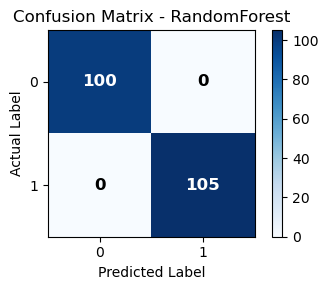

In [13]:
# Detailed classification report and confusion matrix for the best model (by test accuracy)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

best_name = results_df.sort_values('test_accuracy', ascending=False).iloc[0]['model']
print('Best model:', best_name)

best_model = None
for name, model in models:
    if name == best_name:
        best_model = model
        break

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print('\nClassification report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_name}')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black',
                 fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [12]:
# Save the best model and the scaler to disk for later use
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print('Saved best model to best_model.pkl and scaler to scaler.pkl')

Saved best model to best_model.pkl and scaler to scaler.pkl


| Metric        | Measures                      | Range | Ideal Value | Used For               |
| ------------- | ----------------------------- | ----- | ----------- | ---------------------- |
| cv_accuracy   | Average correctness (CV)      | 0–1   | Higher      | Model stability        |
| cv_roc_auc    | Avg. separability (CV)        | 0.5–1 | Higher      | Class distinction      |
| test_accuracy | Correctness on test data      | 0–1   | Higher      | Generalization         |
| precision     | Correct positive predictions  | 0–1   | Higher      | False positive control |
| recall        | Captured true positives       | 0–1   | Higher      | False negative control |
| f1            | Balance of precision & recall | 0–1   | Higher      | Imbalanced data        |
| roc_auc       | Overall ranking ability       | 0.5–1 | Higher      | Binary classification  |
